In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [3]:
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)
pima.sample(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
343,5,122,86,0,0,34.7,0.290,33,0
543,4,84,90,23,56,39.5,0.159,25,0
613,6,105,80,28,0,32.5,0.878,26,0
665,1,112,80,45,132,34.8,0.217,24,0
530,2,122,60,18,106,29.8,0.717,22,0
399,3,193,70,31,0,34.9,0.241,25,1
407,0,101,62,0,0,21.9,0.336,25,0
268,0,102,52,0,0,25.1,0.078,21,0
188,8,109,76,39,114,27.9,0.640,31,1
633,1,128,82,17,183,27.5,0.115,22,0


In [4]:
features_col =  ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[features_col]
y = pima['label']
X.head(10)

,pregnant,insulin,bmi,age,glucose,bp,pedigree
0,6,0,33.6,50,148,72,0.627
1,1,0,26.6,31,85,66,0.351
2,8,0,23.3,32,183,64,0.672
3,1,94,28.1,21,89,66,0.167
4,0,168,43.1,33,137,40,2.288
5,5,0,25.6,30,116,74,0.201
6,3,88,31.0,26,78,50,0.248
7,10,0,35.3,29,115,0,0.134
8,2,543,30.5,53,197,70,0.158
9,8,0,0.0,54,125,96,0.232


In [5]:
pima.head(10)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
logreg = LogisticRegression(random_state=100, max_iter=1000)
logreg.fit(X_train, y_train)
print(f"intercept: {logreg.intercept_}")
print(f"coef: {logreg.coef_}")

intercept: [-9.50943147]
coef: [[ 0.10330554 -0.00121591  0.09791923  0.02328854  0.03847681 -0.01119239
   1.16271099]]


In [7]:
y_pred = logreg.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[106,  21],
       [ 30,  35]])

In [8]:
target_names = ['with diabetes', 'without diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

   with diabetes       0.78      0.83      0.81       127
without diabetes       0.62      0.54      0.58        65

        accuracy                           0.73       192
       macro avg       0.70      0.69      0.69       192
    weighted avg       0.73      0.73      0.73       192



Text(0.5, 427.9555555555555, 'Predicted label')

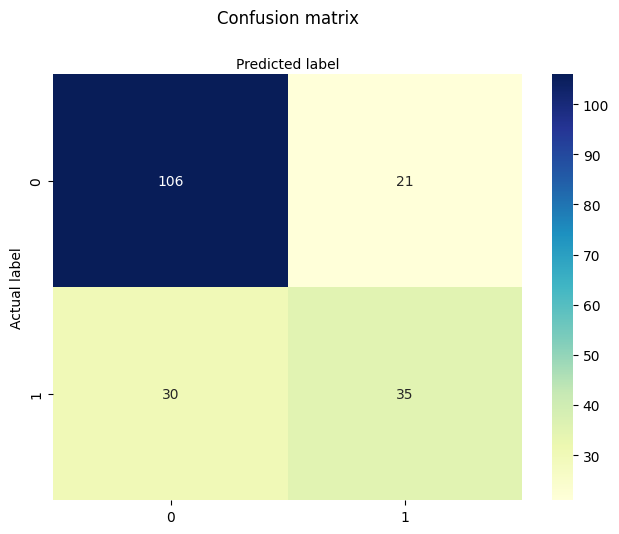

In [9]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')